In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../Data/housing-data.txt')
data.head()

,size,price
0,30.0,75.760161
1,31.0,81.662679
2,32.0,60.944950
3,33.0,67.890597
4,34.0,87.957014


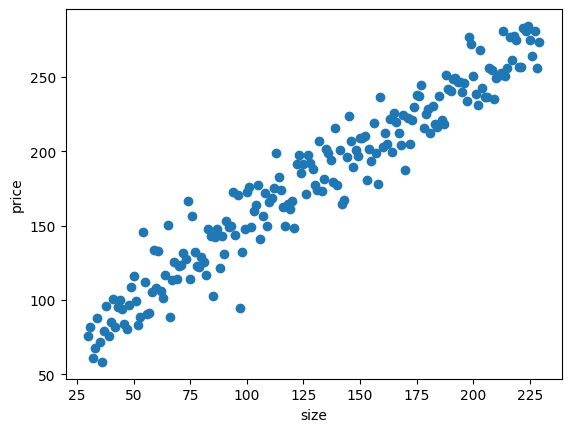

In [3]:
plot = plt.scatter(data['size'], data['price'])
plt.xlabel('size')
plt.ylabel('price')
plot

In [4]:
def compute_cost(theta, X, y):
    m = len(y)  # Number of training examples
    h = X @ theta  # Hypothesis function: hθ(x) = X * θ
    squared_errors = np.square(h - y)
    J = np.sum(squared_errors) / (2 * m)  # Cost function: J(θ) = (1/2m) * sum((hθ(x) - y)^2)
    return J
    

In [5]:
## defining variables
# Number of observations
n= len(data['size'])
# defining vactor X
X_vector = np.array(data['size']).reshape(n, -1)
#creating one vector
x_ones = np.ones(n)
#converting the array to vertical
ones_vector  =x_ones.reshape(n,1)
# creat a matrix of x_ones and X
X = np.concatenate((ones_vector, X_vector), axis=1)

In [6]:
# defining y vector(price)
y = np.array(data['price']).reshape(n, 1)

In [7]:
# defining theta
theta = np.array([[0],[0]])

In [8]:
# call ths function
J = compute_cost(theta, X, y)
print('cost = {:.2f}'.format(J))

cost = 17840.78


In [1]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)  # Number of training examples
    costs = []  # Empty list to store the costs
    
    for i in range(num_iters):
        h = X @ theta  # Calculating the predicted value h
        
        gradient = (1/m) * np.dot(X.T, (h - y))  # Computing the gradient
        updated_theta = theta - alpha * gradient  # Updating theta using gradient descent
        
        J = (1 / (2 * m)) * np.sum((h - y) ** 2)  # Calculating the cost J(theta)
        costs.append(J)  # Storing the cost in the list
        
    return  updated_theta, costs
costs, update_theta = gradient_descent(l)

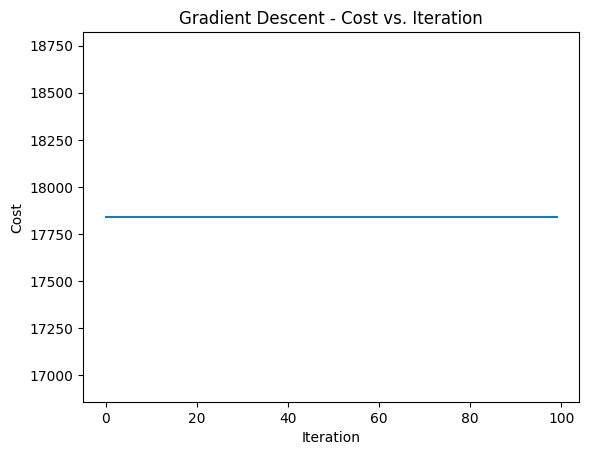

In [18]:
plt.plot(costs)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Gradient Descent - Cost vs. Iteration')
plt.show()